# Environment setting

In [1]:
# move to source directory
%pwd
%cd ../
%pwd
%ls

/home/yh/git/kaggle_ieee-fraud-detection
LICENSE*    kaggle-submit-ieee.sh*   run_0008-xgb-magic.py*
Makefile*   log/                     run_0009-xgb-nroman.py*
README.md*  model/                   src/
config/     notebook/                startup-jupyter.sh*
data/       run_0006-lgb-magic.py*   util/
feature/    run_0007-lgb-nroman.py*


In [2]:
# import major modules
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
sys.stdout.flush()

In [8]:
from config.config_0008 import config
from util.easydict import EasyDict
c = EasyDict(config)
c.keys()

dict_keys(['runtime', 'transformer', 'model', 'trainer', 'log'])

# Read data

In [9]:
c

{'runtime': {'ROOTDIR': PosixPath('/home/yh/git/kaggle_ieee-fraud-detection'),
  'VERSION': '0008',
  'RANDOM_SEED': 42,
  'DESCRIPTION': 'xgb-magic',
  'RUN_TRAIN': True,
  'RUN_PRED': True,
  'out_sub_path': PosixPath('/home/yh/git/kaggle_ieee-fraud-detection/data/submission/submission_0008.csv')},
 'transformer': {'ROOTDIR': PosixPath('/home/yh/git/kaggle_ieee-fraud-detection'),
  'VERSION': '0008',
  'features': ['magic'],
  'USE_SMALL_DATA': True,
  'out_train_path': PosixPath('/home/yh/git/kaggle_ieee-fraud-detection/data/feature/transformed_0008_train.pkl'),
  'out_test_path': PosixPath('/home/yh/git/kaggle_ieee-fraud-detection/data/feature/transformed_0008_test.pkl')},
 'model': {'TYPE': 'xgb',
  'params': {'num_boost_round': 10000,
   'max_depth': 5,
   'learning_rate': 0.01,
   'subsample': 0.9,
   'colsample_bytree': 0.9,
   'missing': nan,
   'eval_metric': 'auc',
   'nthread': 4,
   'tree_method': 'hist',
   'early_stopping_rounds': 10},
  'dir': PosixPath('/home/yh/git/ka

In [11]:
log = pd.read_csv(c.log.train_log_path, delimiter='\t')
print(log.shape)
log.head()
log.tail()

(1000, 4)


,fold,iteration,train_auc,eval_auc
995,1,9960,1.0,0.826345
996,1,9970,1.0,0.826357
997,1,9980,1.0,0.826414
998,1,9990,1.0,0.826458
999,1,10000,1.0,0.826471


Text(0, 0.5, 'auc')

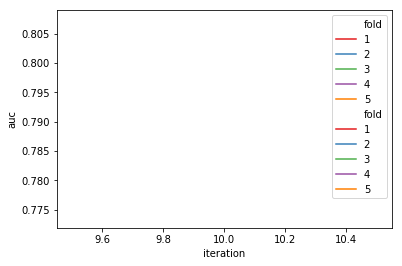

In [8]:
sns.lineplot(x="iteration", y="train_auc", data=log, palette=sns.color_palette("Set1", 5), hue='fold')
sns.lineplot(x="iteration", y="val_auc", data=log, palette=sns.color_palette("Set1", 5), hue='fold')
plt.ylabel('auc')

In [9]:
importance = pd.read_csv('feature/importance/importance_0007.csv')
importance.columns = ['feature', 'importance']
importance.head()

,feature,importance
0,TransactionAmt,0.0
1,ProductCD,0.0
2,card1,0.0
3,card2,0.0
4,card3,0.0


In [10]:
data = importance.sort_values(by="importance", ascending=False)[0:20]
data.head()

,feature,importance
260,id_06,38.447701
213,V268,33.701099
285,D11__DeviceInfo,3.473750
237,V307,3.007280
196,V245,0.000000


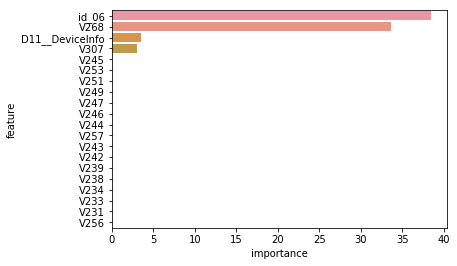

In [11]:
sns.barplot(x="importance", y="feature", data=data);